<a href="https://colab.research.google.com/github/SifatAnik/Daraz_Customers_Reviews_Sentiment_Analysis/blob/main/Daraz_Product_Reviews_Sentiment_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DM project /Daraz_reviews.csv', index_col=0,header=0,error_bad_lines=False)
df.reset_index(drop=True, inplace=True)
df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Score,Text,Product name
0,4,"Works fine. Anyone wants to buy, I recommend.",Silicone Magnetic Anti Snore Nose Clip
1,3,"Doesn't work, Waste of money Don't BUY this.",Silicone Magnetic Anti Snore Nose Clip
2,5,excellent product...I didn't snore,Silicone Magnetic Anti Snore Nose Clip
3,5,very poor quality,Silicone Magnetic Anti Snore Nose Clip
4,5,It doesn’t work,Silicone Magnetic Anti Snore Nose Clip


In [4]:
df=df[['Text','Score']]
df

,Text,Score
0,"Works fine. Anyone wants to buy, I recommend.",4
1,"Doesn't work, Waste of money Don't BUY this.",3
2,excellent product...I didn't snore,5
3,very poor quality,5
4,It doesn’t work,5
...,...,...
2075,I found that the product is very beautiful,4
2076,Really beautiful. Thanks Seller Tusar vai .,5
2077,This product is very bad condation,1
2078,"In short, a very nice watch for so little money",5


In [5]:
df.isnull().sum()

Text     0
Score    0
dtype: int64

In [6]:
df['Score'].value_counts()

5    1025
1     477
3     227
2     195
4     156
Name: Score, dtype: int64

### EDA

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


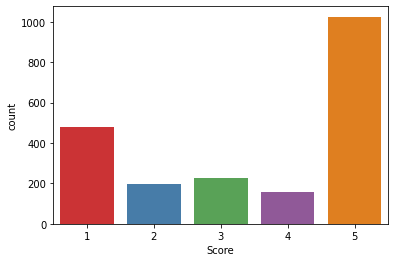

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot( df['Score'], palette ='Set1')
plt.ylabel=('count')
plt.xlabel=('rating')
plt.show()

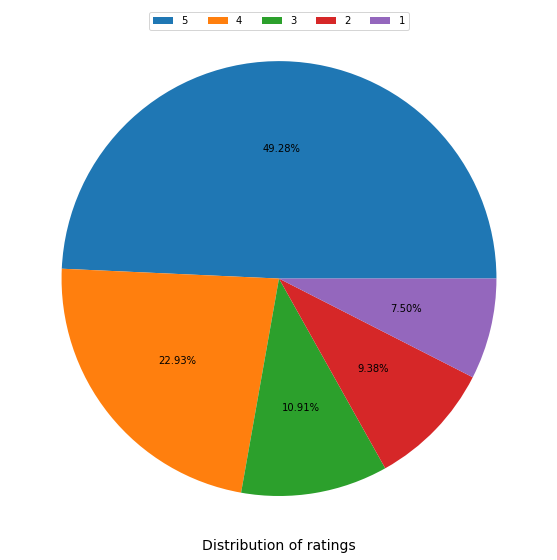

In [8]:
plt.figure(figsize = (10, 10))
label=[5,4,3,2,1]
plt.pie(df['Score'].value_counts(), autopct='%0.2f%%')
plt.legend(label, ncol=6, loc=9)
plt.title('Distribution of ratings', size=14, y=-0.01)
plt.show()

In [9]:
sentiment = {1: 0,
            2: 0,
            3: 0,
            4: 1,
            5: 1}

In [10]:
df['sentiment']=df['Score'].map(sentiment)
df

,Text,Score,sentiment
0,"Works fine. Anyone wants to buy, I recommend.",4,1
1,"Doesn't work, Waste of money Don't BUY this.",3,0
2,excellent product...I didn't snore,5,1
3,very poor quality,5,1
4,It doesn’t work,5,1
...,...,...,...
2075,I found that the product is very beautiful,4,1
2076,Really beautiful. Thanks Seller Tusar vai .,5,1
2077,This product is very bad condation,1,0
2078,"In short, a very nice watch for so little money",5,1


In [11]:
df['sentiment'].value_counts()

1    1181
0     899
Name: sentiment, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


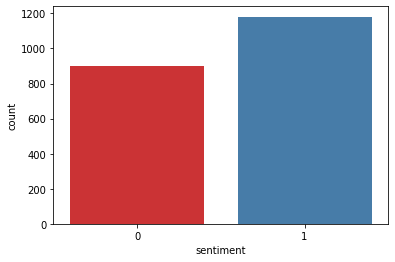

In [12]:
sns.countplot( df['sentiment'], palette ='Set1')
plt.ylabel=('count')
plt.xlabel=('rating')
plt.show()

In [13]:
words = pd.Series(' '.join(df['Text']).split())
words

0         Works
1         fine.
2        Anyone
3         wants
4            to
          ...  
14424        is
14425    really
14426      good
14427     .like
14428        it
Length: 14429, dtype: object

### Data Pre_processing

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stopword_list = stopwords.words('english')
suitable_stopwords=[]
l =["n'",'nor','no']
for i in stopword_list:
    if not any(words in i for words in l):
        suitable_stopwords.append(i)

replace_list=['ain','hate','bad','worse', 'aren', 'couldn', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn', 'needn',
              'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn',"n't","n'"] 

def remove_stopwords(stmt):
    filtered_sentence = []
    stmt=stmt.lower()
    words = word_tokenize(stmt)
    
    for w in words:
        if w not in suitable_stopwords or w == 'not':
            if w not in replace_list:
                filtered_sentence.append(w)
            else:
                filtered_sentence.append(w+' not')
    return " ".join(filtered_sentence)


In [17]:
import re
import string

def cleanstr(text):
    text = text.lower()
    punc = string.punctuation.replace("'", "") # exclude single quotes
    text = re.compile('[%s]' % re.escape(punc)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(' \d+', ' ', text)
    return text

In [18]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [19]:
def lemmatize(text):
    wl = WordNetLemmatizer()
    lemmatized_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    word_pos_tags = nltk.pos_tag(words)
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    return " ".join(lemmatized_sentence)

In [20]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [21]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [22]:
df['text']=df['Text'].apply(cleanstr)
df['text']=df['text'].apply(remove_stopwords)
df['text']=df['text'].apply(lemmatize)
df['text']

0            work fine anyone want buy recommend
1           n't not work waste money n't not buy
2                excellent product n't not snore
3                                   poor quality
4                                         ’ work
                          ...                   
2075                      find product beautiful
2076    really beautiful thanks seller tusar vai
2077                   product bad not condation
2078               short nice watch little money
2079               love product really good like
Name: text, Length: 2080, dtype: object

## Word Cloud

In [23]:
# Filter for only positive and negative reviews
positive_reviews = df[df['sentiment'] == 1]['text'].str.cat(sep=' ')
negative_reviews = df[df['sentiment'] == 0]['text'].str.cat(sep=' ')

# Generate word clouds for positive and negative reviews
positive_cloud = WordCloud(width=800, height=600, min_font_size=11).generate(positive_reviews)
negative_cloud = WordCloud(width=800, height=600, min_font_size=11).generate(negative_reviews)

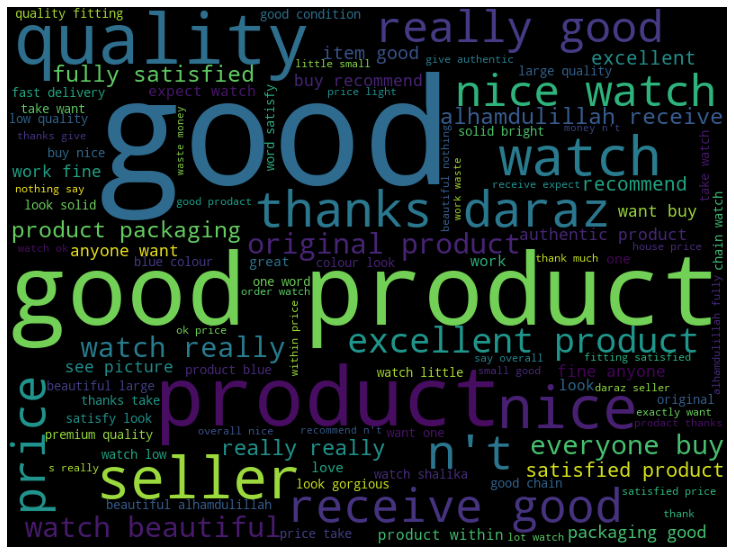

In [24]:

# Positive Plot the word clouds
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(positive_cloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

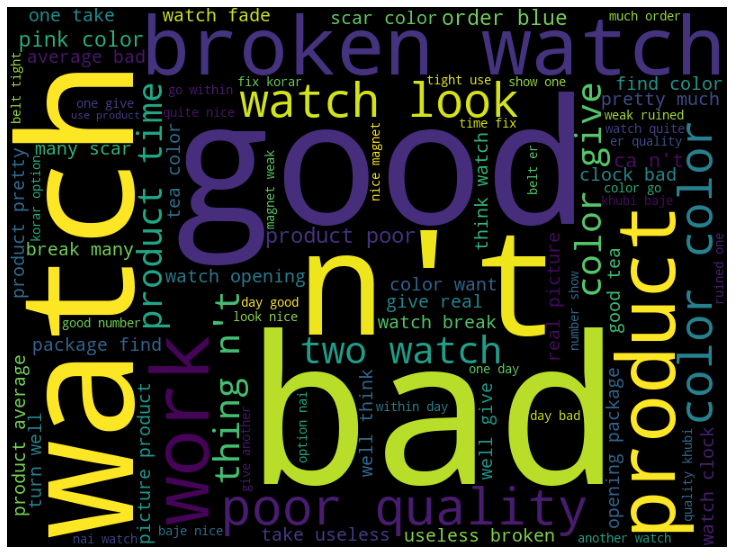

In [25]:
# Negative Plot the word clouds
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(negative_cloud)
plt.axis("off")
plt.tight_layout(pad=0)

### Train And Vectorization

In [26]:
# Split the dataset into features (reviews) and target (ratings)
X = df['text']
y = df['sentiment']

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the reviews into numerical features using Tf-idf
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101,shuffle=True)

In [ ]:
print(train_matrix.shape)

(1636, 430)


In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

### Model Building

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [31]:
#Random Forest Classifier
RFClassifier=RandomForestClassifier()
RFClassifier.fit(X_train,y_train)
print("The Random Forest Classifier Score ->", RFClassifier.score(X_test,y_test))

The Random Forest Classifier Score -> 0.96875


In [32]:
# Create the AdaBoost classifier
ADClassifier = AdaBoostClassifier()
# Train the classifier on the training data
ADClassifier.fit(X_train,y_train)
print("The AdaBoost Classifier Score ->", ADClassifier.score(X_test,y_test))

The AdaBoost Classifier Score -> 0.9014423076923077


In [33]:
# Logistic Regression
LRClassifier = LinearSVC()
LRClassifier.fit(X_train,y_train)
predictions = LRClassifier.predict(test_data)
print(classification_report(true_labels, predictions))

print("The Logistic Regression Classifier Score ->", LRClassifier.score(X_test, y_test))

The Logistic Regression Classifier Score -> 0.9711538461538461


In [34]:
#Multinomial Naive Bayes
NBClassifier = MultinomialNB()
NBClassifier.fit(X_train,y_train)
print("Multinomial Naive Bayes Score -> ",NBClassifier.score(X_test,y_test))

Multinomial Naive Bayes Score ->  0.9375


### Testing With New Data

In [42]:
text=" this product is  best clock"

text=cleanstr(text)
text=remove_stopwords(text)
text=(lemmatize(text))
print(text)

product best clock


In [43]:

vec=vectorizer.transform([text])
pre=LRClassifier.predict(vec)
if pre==0:
    print("Negative")
else:
    print("Positive")

Positive
